# Project: Investigate a Dataset - [tmdb-movies.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction ##

### Dataset Description ## 

This dataset is a collection of movies from IMDB from the 1960's to 2015. This collection of movies has genres like action, adventure, drama, and so on.<b>
    
The columns of the dataset are listed below:<br>
id: The unique number that identifies each row or record <br>
imdb_id: The unique number assigned by IMDB<br>
popularity: This is a number that represents the popularity of the movie among people<br>
budget: This is the amount of money spent in making the movie in the year it was made<br>
revenue: This is the amount of money made from sales of the movie<br>
original_title: This is the title of the movie<br>
cast: This gives us the names of the actors and actresses<br>
homepage: This gives the url of the movie<br>
director: This gives the name(s) of the director(s) of the movies<br>
tagline: This is a catch phrase that is associated with the movie<br>
keywords: This is a set of words that are associated with the movie<br>
overview: This gives the synopsis of the movie<br>
runtime: This gives the total time the movie runs for<br>
genres: This column tells us what genre the movies are; drama, action, adventure, and so on.<br>
production_companies: This gives the production company or companies responsible for producing the movie<br>
release_date: This gives the date when the movie was released<br>
vote_count: This gives the total number of people that voted for or against the movie in IMDB <br>
vote_average: This gives the average rating of the movie out of 10.0<br>
release_year: This gives the year the movie was released<br>
budget_adj: This gives the budget for making the movie adjusted for inflation<br>
revenue_adj: This gives the revenue made from movie sales, adjusted for inflation<br>
    

### Question(s) for Analysis ###
1.0 Relationship between budget and popularity.<br>
1.1 Movies that had highest revenue for each year and what year was the most revenue made on movies.<br>
1.2 Highest grossing movies for each year<br>
1.3 The most expensive movie made each year<br>
1.4 Is there any correlation between release date [period] and revenue?<br>
1.5 The season most movies are released<br>

In [1]:
#Importing the relevant packages and modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast
import sys
import json
sys.path.append(r"./txt_to_json.py")

from txt_to_json import txt_to_json_converter

sns.set()

%matplotlib inline

In [2]:
#Read the dataset

data = pd.read_csv("tmdb-movies.csv", parse_dates=['release_date'])

#Use parse_dates to help convert release date colume to a datetime column

data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

In [4]:
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Brief Insight ##

### About the data ##
1. At first glance, there is a big skew in budget because of the min, 25%, 50% values compared with the 75% and max values, implying that there are relatively fewer big budget movies in the dataset

2. On average movies last about 99-102 minutes long, judging by the mean and median values. The column distribution seems a fairly symmetrical.

3. Most movies in the dataset recieved a rating of around 5-7 out of 10.

4. There are fewer movies from earlier than 1995 and majority of the movies are within a 20 year span starting from 1995


### More info ###
1. There are a total of 10866 rows in the dataset.

2. There are some missing values in the following columns:
<br>Cast: 10790
<br>homepage: 2936 (drop)
<br>Director: 10822
<br>tagline: 8042 (drop)
<br>keywords: 9373 (drop)
<br>production companies: 9836

(*Note*:The values with "drop" will be dropped from the date because they are not needed in the analysis) 

<a id='wrangling'></a>
## Data Cleaning


The Data Cleaning process will be done in the following steps:

<br>
1. Drop Homepage, tagline, keyword, budget, revenue, overview. The 'budget' and 'revenue' columns are dropped because
they are have not been adjusted for inflation unlike 'budget_adj' and 'revenue_adj'<br>
2. Deal with missing values:
<br>
    2.1 Directors: check which movies have no directors and see if you can find the directors else input unknown director
    <br>2.2 Genres: check which movies have  no genres and see if you can input them else input "unknown genres"
    <br>2.3 Production companies: "unknown production company" <br>
    2.4 Dealing with original_titles with bad names. Remove unwanted characters.


In [5]:
#Data Cleaning
#Step 1:Drop Homepage, tagline, keyword, budget, revenue, overview

df = data.drop(['homepage', 'tagline', 'keywords', 'budget', 'revenue', 'overview'], axis = 1)
df.head(2)

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [6]:
#Step 2: Dealing with missing values:
#Step 2.1: Directors


#Getting the number of null values in the director column

null_directors = df['director'].isnull().sum()
print(f"There are {null_directors} null values for director column")

There are 44 null values for director column


In [7]:
#To rectify this problem, I have taken the liberty of finding the director names missing in the dataset. I have stored them in 
#dictionary format in a .txt file in the working directory

#I have taken this .txt file and converted it to a json file using the txt_to_json_converter method imported from the 
#txt_to_json module I created

#I have read the json file in this cell and used the ast module to expose the dictionary element from the output string

#I have wrapped this whole operation in a function so that I can use it multiple times.

#The dictionary values is shown below:


def dict_from_txt(txtfilename):
    txt_to_json_converter(f"{txtfilename}")
    
    with open(f'{txtfilename[:-4]}.json', 'r') as json_file:
        contents = json.loads(json_file.read())
        #print(contents)
        json_file.close()
    dic = ast.literal_eval(contents[0])
    return dic


def declare_missing_vals(column_name, dataframe_object):
    null_cols = dataframe_object[column_name].isnull().sum()
    print(f"There are {null_cols} null values for {column_name} column")
    return null_cols
    

def fill_missing_vals(txtfile, column_name, by_column, dataframe_object):
    dic = dict_from_txt(txtfile)
    dataframe_object[column_name] = dataframe_object[column_name].fillna(dataframe_object[by_column]).map(dic)
    declare_missing_vals(column_name, dataframe_object)
    
    #df["director"] = df["director"].fillna(df["original_title"].map(director_dic))

director_dic = dict_from_txt("unknown_movie_directors.txt")

In [8]:
cols_with_unknowns= ['director', 'genres', 'cast', 'production_companies']

for col in cols_with_unknowns:
    declare_missing_vals(col, df)


There are 44 null values for director column
There are 23 null values for genres column
There are 76 null values for cast column
There are 1030 null values for production_companies column


In [9]:
#Try to get the movie names and their directors:
df[df['director'].isnull()][['original_title', 'release_date']]

,original_title,release_date
532,Iliza Shlesinger: Freezing Hot,2015-01-23
548,Sense8: Creating the World,2015-08-10
556,With This Ring,2015-01-24
1032,Marvel Studios: Assembling a Universe,2014-03-18
1054,Unlocking Sherlock,2014-01-19
1203,Free to Play,2014-03-19
1241,Dance-Off,2014-01-01
1288,Top Gear: The Perfect Road Trip 2,2014-11-17
1852,The Diary of Anne Frank,2009-01-09
1872,Paa,2009-12-04


In [10]:
#Using fillna to map the values from the dictionary to the empty values in the director column

df["director"] = df["director"].fillna(df["original_title"].map(director_dic))

null_directors = df['director'].isnull().sum()
print(f"There are {null_directors} null values for director column")

There are 7 null values for director column


In [11]:
#Replacing the 7 remaining null values with "Unknown director"

df["director"] = df["director"].fillna("unknown director")

null_directors = df['director'].isnull().sum()
print(f"There are {null_directors} null values for director column")

There are 0 null values for director column


In [12]:
#Step 2: Dealing with missing values:
#Step 2.2: Genres

null_genres = df['genres'].isnull().sum()
print(f"There are {null_genres} null values for genre column")

There are 23 null values for genre column


In [13]:
df[df['genres'].isnull()][['original_title', 'release_date']]

,original_title,release_date
424,Belli di papÃ,2015-10-29
620,All Hallows' Eve 2,2015-10-06
997,Star Wars Rebels: Spark of Rebellion,2014-10-03
1712,Prayers for Bobby,2009-02-27
1897,Jonas Brothers: The Concert Experience,2009-02-27
2370,Freshman Father,2010-06-05
2376,Doctor Who: A Christmas Carol,2010-12-25
2853,Vizontele,2001-02-02
3279,ì•„ê¸°ì™€ ë‚˜,2008-08-13
4547,London 2012 Olympic Opening Ceremony: Isles of...,2012-07-27


In [14]:
genre_dict = dict_from_txt("unknown_genres.txt")


In [15]:
#Using fillna to map the values from the dictionary to the empty values in the genre column

df["genres"] = df["genres"].fillna(df["original_title"].map(genre_dict))


null_genres = df['genres'].isnull().sum()
print(f"There are {null_genres} null values for genre column")

There are 4 null values for genre column


In [16]:
#Replacing the 7 remaining null values with "Unknown genre"

df["genres"] = df["genres"].fillna("unknown genre")

null_genres = df['genres'].isnull().sum()
print(f"There are {null_genres} null values for genre column")

There are 0 null values for genre column


In [17]:
null_cast = df['cast'].isnull().sum()
print(f"There are {null_cast} null values for cast column")

There are 76 null values for cast column


In [18]:
df[df['cast'].isnull()][['original_title', 'release_date']].iloc[-26:, :]

,original_title,release_date
5413,The Brave Little Toaster to the Rescue,1997-11-01
6024,Narco Cultura,2013-11-22
6055,Somm,2013-06-21
6078,Trophy Kids,2013-12-04
6374,One Man Band,2005-06-21
6514,9,2005-04-21
6736,Lifted,2006-12-28
6760,The Little Matchgirl,2006-09-07
6870,Peter & the Wolf,2006-09-23
6930,Kiwi!,2006-01-01


In [19]:
d = {"Sanjay's Super Team" :  "Brent Schraff|Sunny Singh Attar|Arun Rao","Winter on Fire: Ukraine's Fight for Freedom":"Bishop Agapit|Catherine Ashton|Serhii Averchenko|Kristina Berdinskikh|Julie DiFonzo|Pavlo Dobryanskyy|Valery Dovgiy|Bohdan Dubas","Bitter Lake": "Joanne Herring|Mike Martin","A Faster Horse": "Lee lacocca|Isaac Hagy|Prakash Patel|Gale Halderman|Hal Sperlich|Steve Denby","The Mask You Live In": "Tony Porter|Byron Hurt|Jackson Katz|Ashly Burch|Philip Zimbardo","The Hunting Ground": "Kirby Dick|Amy Ziering|Amy Herdy|St. Vincent|Kamilah Willingham|Andrea Pino","Star Wars: TIE Fighter": "Guy Siner|Scott Lawrence|Denny Delk|Nick Jameson|Tris King","All Hallows' Eve 2": "Damien Monier|Andrea Monier|Jonathan Nation|Bill Oberst Jr.","Finding Vivian Maier": "Vivian Maier|John Maloof|Mary Ellen Mark|Phil Donahue|Tim Roth|Mary Baylaender","The Search for General Tso": "Jennifer 8. Lee|MichaelTong|Phillip Chiang","Last Days in Vietnam": "Stuart A. Herrington|Graham Martin|Ron Nessen|Pete McCloskey|Jim Laurie|Richard Nixon","Cowspiracy: The Sustainability Secret": "Kip Anderson|Lisa Agabian|Bruce Hamilton|Kamyar Guivetchi|Howard Lyman|Heather Cooley","No No: A Dockumentary": "Dock P. Ellis Jr.|Ron Howard|Larry Demery","Happy Valley": "Sarah Lancashire|James Norton|Siobhan Finneran|Rhys Connah","Kids for Cash": "Sandy Fonzo|Mark Ciavarella|Michael Conahan|Charlie Balasavage|Jim Avila","Love Me": "Bob Morley|William Lodder|Bojana Novakovic|Hugo Weaving|Heather Mitchell","Rich Hill":"Andrew Jewel|Harley Hood|Alyssa Jewel|Appachey West","Pantani: The Accidental Death of a Cyclist" : "Marco Pantani|Conan Sweeny|Andrea Gambadoro|Lance Armstrong|Greg LeMond","Emmet Otter's Jug-Band Christmas" : "Jim Henson|Richard Hunt|Jerry Nelson|Frank Oz|Eren Ozker|Dave Goelz|Marilyn Sokol","Objectified": "Amber Shonts|Jony Ive|Dieter Rams|Naota Fukasawa|Karim Rashid|Marc Newson|Chris Bangle","Alma": "Sophie willian|Siobhan Finneran|Lorraine Ashbourne|Jayde Adams|James Baxter|Dave Spikey|Nicholas Asbury","Talhotblond": "Courteney Cox|Garret Dillahunt|Laura San Giacomo|Molly Hogan|Brando Eaton|Ashley Hinshaw","Life Cycles": "Graham Agassiz|Thomas Sanderham|Cam McCaul|Brandon Semenuk|Riley McIntosh|Matt Hunter","Wonders of the Solar System" : "Brian Cox|Richard Hoover|Carolyn Porco|Ralph Lorenz|Alan Hildebrand","Tabloid" : "Joyce McKinney|Kent Gavin|Jeff Bosley|Jackson Shaw|Troy Williams","The Making of The Walking Dead": "Chandler Riggs|Andrew Lincoln|Emma Bell|Sarah Wayne Callies|Laurie Holden|Michael Rooker","Into Eternity": "Michael Madsen|Esko Roukola|Carl Reinhold|Peter Wikberg|Daniel Dencik","Zeitgeist: Addendum" : "Peter Joseph|Jacque Fresco|Roxanne Meadows|George Carlin|John Perkins","Wizards On Deck With Hannah Montana": "David Henrie|Brenda Song|Dylan Sprouse|Cole Sprouse","Barbie: A Fairy Secret": "Diana Kaarina|Adrian Petriw|Tabitha St. Germain|Patricia Drake","Urbanized": "Michael Sorkin|Rem Koolhaas|Gary Hustwit|Eduardo Paes","Happiness Is a Warm Blanket, Charlie Brown": "Austin Lux|Amanda Pace|Trenton Rogers|Grace Rolek|Shane Baumel","5 Broken Cameras":"Emad Burnat|Soraya|Gibreel|Taki-Ydin|Yasin","The Maker": "Matthew Modine|Mary-Louise|Jonathan Rhys Meyers|Fairuza Balk|Michael Madsen|Kate McGregor","There's Something Wrong with Aunt Diane": "Jesse Temple|Brad Katinas|Diane Schuler|Daniel Schuler|Warren Hance","Steve Jobs: One Last Thing": "Bill Fernandez|Robert Palladino|Dean Hovey|Ross Perot|Demetri Goritsas","Naqoyqatsi": "Belladonna|Marlon Brando|Elton John|Julia Louis-Dreyfus|Madonna","Spellbound": "Harry Altman|Angela Arenivar|Ted Brigham|April DeGideo|Neil Kadakia|Nupur Lala|Emily Stagg|Ashley White","Hungry For Change": "Mike Adams|Nick Bolton|James Caitlin|Kris Carr|James Colquhoun|Joe Cross|Harvey Diamond|Frank Ferrante","2016: Obama's America": "Jay Bastian|Joe Biden|Cait Brasel|Gene Burris Jr.|Dinesh D'Souza|Alice Dewey|Lisa Fox|Zackary Steven Graham","McCullin":"Harold Evans|Don McCullin|Michael Parkinson|Sue Ryder","The Men Who Built America": "Eric Rolland|Adam Jonas Segaller|David Donahoe","The Brave Little Toaster to the Rescue": "Deanna Oliver|Tim Stack|Roger Kabler|Eric Lloyd|Thurl Ravenscroft|Chris Young|Jessica Tuck","Somm":"Dlynn Proctor|Dustin Wilson|Ian Cauble|Brian McClintic","Trophy Kids": "Amari Avery|Derek Biale|Ian Fox|Justus Moore","One Man Band":"Oja Kodar|Ingrid Bergman|Tim Brooke-Taylor|Michael Bryant|Graeme Garden|Charles Gray|Laurence Harvey|Jeanne Moreau|Orson Welles","9": "Tim Burton|Elijah Wood|Jennifer Connelly","Lifted": "Uriah Shelton|Dash Mihok|Lexi Alexander","The Little Matchgirl": "Keshia Knight Pulliam|William Daniels|John Rhys-Davies|Jim Metzler|William Youmans|Hallie Foote|Maryedith Burrell|Rue McClanahan","Peter & the Wolf": "Kirstie Alley|Ross Malinger|Lloyd Bridges|George Daugherty|David Ka Lik Wong","Kiwi!": "Holly Shervey|Alison Bruce|Phil Peleton","Encounters at the End of the World": "Werner Herzog|Scot Rowland|Henry Kaiser|Erik Nelson|Phil Fairclough|Dave Harding|Julian Hobbs","Zeitgeist": "Chogyam Trungpa|Jordan Maxwell|George Carlin|Bill Hicks|David Ray Griffin|Joe Casaliggi|Condoleezza Rice|George W. Bush","Loose Change: Final Cut": "Dylan Avery|Mahmoud Ahmad|Ahmed Al-Ghamdi|Hamza Al-Ghamdi|Saeed Al-Ghamdi","Baraka": "Mark Magidson|Lisa Gerrard|Alton Walpole","Tin Toy": "Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten","Powaqqatsi" : "Christie Brinkley|David Brinkley|Patrick Disanto|Pope John Paul II|Dan Rather","Peter Pan": "Jaye Rosenberg|Phillip Hinton|Keith Scott|Daniel Floyd|Carol Adams|Olivia Martin|Ben Brennan","The Big Shave": "T.T. Boy|Vladmir Correa|Mark Davis|Chantilly Lace|Jonathan Morgan|Stacey Nichols","Luxo Jr.": "Jason Drucker|Tom Kane|Tara Strong|Drake Bell|Cree Summer|Cathy Weseluck|Nicolas Cantiu|Frank Welker"}


In [20]:
cast_dict = dict_from_txt("unknown_cast.txt")

In [21]:
len(cast_dict)

60

In [22]:
df["cast"] = df["cast"].fillna(df["original_title"].map(cast_dict))


null_cast = df['cast'].isnull().sum()
print(f"There are {null_cast} null values for cast column")

There are 16 null values for cast column


In [23]:
null_company = df['production_companies'].isnull().sum()
print(f"There are {null_company} null values for production companies column")

There are 1030 null values for production companies column


In [24]:
#Filling all null values in the production companies column with "unknown company"

df['production_companies'] = df['production_companies'].fillna('unknown_company')

null_company = df['production_companies'].isnull().sum()
print(f"There are {null_company} null values for production companies column")

There are 0 null values for production companies column


In [25]:
df['original_title'].apply(lambda x: x.isalnum()).sum() 

2059

In [26]:
len(df['original_title'].str.isalpha())

10866

In [27]:
#Replacing non-english characters with a blank in the original_title column

df['original_title'] = df['original_title'].str.replace('[^a-zA-Z0-9 ]', '')


<a id='wrangling'></a>
## Data Wrangling


Next is the data wrangling process. This process consists of the following steps:

1. Rename budget_adj to budget and revenue_adj to revenue.
2. Create grossing and percent_grossing column. The grossing column will show the profit made off the movies, while 
percent_grossing will show by what factor the initial budget was recouped
3. Put all string values to lower case.
4. Break cast, director, genres, and production_companies into fragments.
5. Deal with dates:
<br>
- Check if release date year == release year: This is to ensure consistency of the data
<br>
- Create a month column
<br>
- Create a day column
<br>
- Create a quarter column
<br>


In [28]:
#Data Wrangling:
#Step 1: Rename budget_adj to budget and revenue_adj to revenue

df.rename(columns={'budget_adj':'budget', 'revenue_adj':'revenue'}, inplace = True)
df.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,Star Wars The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [29]:
#Step 2: Create grossing and percent_grossing column

df['grossing'] = df['revenue'] - df['budget']

try:
    df['percent_grossing'] = np.where(df['budget'] > 0, df['revenue']/df['budget'], df['revenue'])
    
except ZeroDivisionError:
    print("You are trying to divide by zero")

In [30]:
#Step 3:Convert all string values to lower case

string_cols = ['original_title', 'cast', 'director', 'genres', 'production_companies']

for col in string_cols:
    df[col] = df[col].str.lower()
    
df.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,grossing,percent_grossing
0,135397,tt0369610,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,action|adventure|science fiction|thriller,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
1,76341,tt1392190,28.419936,mad max fury road,tom hardy|charlize theron|hugh keays-byrne|nic...,george miller,120,action|adventure|science fiction|thriller,village roadshow pictures|kennedy miller produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,2.522909
2,262500,tt2908446,13.112507,insurgent,shailene woodley|theo james|kate winslet|ansel...,robert schwentke,119,adventure|science fiction|thriller,summit entertainment|mandeville films|red wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,2.683984
3,140607,tt2488496,11.173104,star wars the force awakens,harrison ford|mark hamill|carrie fisher|adam d...,j.j. abrams,136,action|adventure|science fiction|fantasy,lucasfilm|truenorth productions|bad robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,10.340891
4,168259,tt2820852,9.335014,furious 7,vin diesel|paul walker|jason statham|michelle ...,james wan,137,action|crime|thriller,universal pictures|original film|media rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,7.927628


In [31]:
#Step 4: Break cast, director, genres, and production_companies into fragments.

#This is done with the use of a function called fragment_cluster. It makes a copy of the original df and then splits the 
#dataframe by pipe symbol("|") that appears in each column we would like to fragment.

#The evec() function helps with dynamic creation of the fragmented dataframes based on columns we would like to fragment


df['cast'] = df['cast'].fillna('unknown_cast')

fragment_cols = ['cast', 'director', 'genres', 'production_companies']

def fragment_cluster(dataframe, column_name):
    df = dataframe.copy()
    df[column_name] = df.apply(lambda x: x[column_name].split('|'), axis = 1)
    df = df.explode(column_name)
    
    return df


for col in fragment_cols:
    exec(f'df_{col} = fragment_cluster(df, col)')
         
#df_cast = fragment_cluster(df, "cast")

In [32]:
df_cast.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,grossing,percent_grossing
0,135397,tt0369610,32.985763,jurassic world,chris pratt,colin trevorrow,124,action|adventure|science fiction|thriller,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
0,135397,tt0369610,32.985763,jurassic world,bryce dallas howard,colin trevorrow,124,action|adventure|science fiction|thriller,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
0,135397,tt0369610,32.985763,jurassic world,irrfan khan,colin trevorrow,124,action|adventure|science fiction|thriller,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
0,135397,tt0369610,32.985763,jurassic world,vincent d'onofrio,colin trevorrow,124,action|adventure|science fiction|thriller,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
0,135397,tt0369610,32.985763,jurassic world,nick robinson,colin trevorrow,124,action|adventure|science fiction|thriller,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192


In [33]:
df_director.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,grossing,percent_grossing
0,135397,tt0369610,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,action|adventure|science fiction|thriller,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
1,76341,tt1392190,28.419936,mad max fury road,tom hardy|charlize theron|hugh keays-byrne|nic...,george miller,120,action|adventure|science fiction|thriller,village roadshow pictures|kennedy miller produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,2.522909
2,262500,tt2908446,13.112507,insurgent,shailene woodley|theo james|kate winslet|ansel...,robert schwentke,119,adventure|science fiction|thriller,summit entertainment|mandeville films|red wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,2.683984
3,140607,tt2488496,11.173104,star wars the force awakens,harrison ford|mark hamill|carrie fisher|adam d...,j.j. abrams,136,action|adventure|science fiction|fantasy,lucasfilm|truenorth productions|bad robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,10.340891
4,168259,tt2820852,9.335014,furious 7,vin diesel|paul walker|jason statham|michelle ...,james wan,137,action|crime|thriller,universal pictures|original film|media rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,7.927628


In [34]:
df_genres.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,grossing,percent_grossing
0,135397,tt0369610,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,action,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
0,135397,tt0369610,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,adventure,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
0,135397,tt0369610,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,science fiction,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
0,135397,tt0369610,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,thriller,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
1,76341,tt1392190,28.419936,mad max fury road,tom hardy|charlize theron|hugh keays-byrne|nic...,george miller,120,action,village roadshow pictures|kennedy miller produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,2.522909


In [35]:
df_production_companies.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,grossing,percent_grossing
0,135397,tt0369610,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,action|adventure|science fiction|thriller,universal studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
0,135397,tt0369610,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,action|adventure|science fiction|thriller,amblin entertainment,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
0,135397,tt0369610,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,action|adventure|science fiction|thriller,legendary pictures,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
0,135397,tt0369610,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,action|adventure|science fiction|thriller,fuji television network,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
0,135397,tt0369610,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,action|adventure|science fiction|thriller,dentsu,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192


In [36]:
#Step 5: Dealing with dates:

# - Creating month, day and quarter columns

df['month'] = df['release_date'].dt.month_name()
df['day'] = df['release_date'].dt.day_name()
df['season'] = df['release_date'].dt.quarter

In [37]:
#Checking if release_date column has the same year as release_year for data consistency

df[df['release_date'].dt.year != df['release_year']].head(50)

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,grossing,percent_grossing,month,day,season
9719,62,tt0062622,3.309196,2001 a space odyssey,keir dullea|douglas rain|gary lockwood|william...,stanley kubrick,149,science fiction|mystery|adventure,stanley kubrick productions|metro-goldwyn-maye...,2068-04-05,1708,7.7,1968,7.522756e+07,3.555466e+08,2.803190e+08,4.726281e+00,April,Thursday,2
9720,871,tt0063442,1.152937,planet of the apes,charlton heston|roddy mcdowall|kim hunter|maur...,franklin j. schaffner,112,adventure|science fiction|mystery,twentieth century fox film corporation|apjac p...,2068-02-07,469,7.2,1968,3.635999e+07,2.093547e+08,1.729947e+08,5.757832e+00,February,Tuesday,1
9721,10331,tt0063350,1.058272,night of the living dead,duane jones|judith o'dea|karl hardman|marilyn ...,george a. romero,96,horror,laurel group|off color films|image ten|market ...,2068-10-01,279,7.2,1968,7.146619e+05,0.000000e+00,-7.146619e+05,0.000000e+00,October,Monday,4
9722,26690,tt0062755,0.891163,the boston strangler,tony curtis|henry fonda|george kennedy|mike ke...,richard fleischer,116,crime|drama|mystery|thriller,twentieth century fox film corporation,2068-10-08,15,6.6,1968,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,October,Monday,4
9723,8069,tt0062711,0.867192,barbarella,jane fonda|john phillip law|anita pallenberg|m...,roger vadim,98,science fiction,dino de laurentiis cinematografica|marianne pr...,2068-10-10,63,5.4,1968,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,October,Wednesday,4
9724,916,tt0062765,0.786854,bullitt,steve mcqueen|jacqueline bisset|robert vaughn|...,peter yates,113,action|crime|drama|thriller,solar productions|warner brothers/seven arts,2068-10-17,143,6.7,1968,3.447930e+07,2.651826e+08,2.307033e+08,7.691068e+00,October,Wednesday,4
9725,14136,tt0064603,0.757746,the love bug,dean jones|michele lee|buddy hackett|joe flynn...,robert stevenson,107,comedy|family|fantasy,walt disney productions,2068-12-22,62,5.8,1968,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,December,Saturday,4
9726,18988,tt0063227,0.747337,the lion in winter,peter o'toole|katharine hepburn|anthony hopkin...,anthony harvey,134,drama|history,avco embassy pictures|haworth productions,2068-01-01,37,6.9,1968,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,January,Sunday,1
9727,805,tt0063522,0.724527,rosemarys baby,mia farrow|john cassavetes|ruth gordon|sidney ...,roman polanski,136,horror|drama|mystery,paramount pictures|william castle productions,2068-06-12,448,7.3,1968,2.006068e+07,2.093547e+08,1.892940e+08,1.043607e+01,June,Tuesday,2
9728,12105,tt0063823,0.698337,yellow submarine,paul angelis|john lennon|paul mccartney|george...,george dunning,90,animation|fantasy|music,apple corps|king features production,2068-07-17,63,7.0,1968,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,July,Tuesday,3


In [38]:
#Since the data is not consistent in the values for the release date and release year, we must rectify it.

#The issue appears to be that there is an added 100 years to the actual release date and this can be dealt with by simply
#subtracting those 100 years

df['release_date'] = np.where(df['release_date'].dt.year != df['release_year'], df['release_date'] - pd.DateOffset(years = 100), df['release_date'])
df.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,grossing,percent_grossing,month,day,season
0,135397,tt0369610,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,action|adventure|science fiction|thriller,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192,June,Tuesday,2
1,76341,tt1392190,28.419936,mad max fury road,tom hardy|charlize theron|hugh keays-byrne|nic...,george miller,120,action|adventure|science fiction|thriller,village roadshow pictures|kennedy miller produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,2.522909,May,Wednesday,2
2,262500,tt2908446,13.112507,insurgent,shailene woodley|theo james|kate winslet|ansel...,robert schwentke,119,adventure|science fiction|thriller,summit entertainment|mandeville films|red wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,2.683984,March,Wednesday,1
3,140607,tt2488496,11.173104,star wars the force awakens,harrison ford|mark hamill|carrie fisher|adam d...,j.j. abrams,136,action|adventure|science fiction|fantasy,lucasfilm|truenorth productions|bad robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,10.340891,December,Tuesday,4
4,168259,tt2820852,9.335014,furious 7,vin diesel|paul walker|jason statham|michelle ...,james wan,137,action|crime|thriller,universal pictures|original film|media rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,7.927628,April,Wednesday,2


In [39]:
#Checking release_date and release_year consistency once more

df[df['release_date'].dt.year != df['release_year']]

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,grossing,percent_grossing,month,day,season


In [40]:
df[df['budget'] == 0]

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,grossing,percent_grossing,month,day,season
30,280996,tt3168230,3.927333,mr holmes,ian mckellen|milo parker|laura linney|hattie m...,bill condon,103,mystery|drama,bbc films|see-saw films|filmnation entertainme...,2015-06-19,425,6.4,2015,0.0,2.700677e+07,2.700677e+07,2.700677e+07,June,Friday,2
36,339527,tt1291570,3.358321,solace,abbie cornish|jeffrey dean morgan|colin farrel...,afonso poyart,101,crime|drama|mystery,eden rock media|filmnation entertainment|flynn...,2015-09-03,474,6.2,2015,0.0,2.056620e+07,2.056620e+07,2.056620e+07,September,Thursday,3
72,284289,tt2911668,2.272044,beyond the reach,michael douglas|jeremy irvine|hanna mangan law...,jean-baptiste lã©onetti,95,thriller,furthur films,2015-04-17,81,5.5,2015,0.0,4.222338e+04,4.222338e+04,4.222338e+04,April,Friday,2
74,347096,tt3478232,2.165433,mythica the darkspore,melanie stone|kevin sorbo|adam johnson|jake st...,anne k. black,108,action|adventure|fantasy,arrowstorm entertainment,2015-06-24,27,5.1,2015,0.0,0.000000e+00,0.000000e+00,0.000000e+00,June,Wednesday,2
75,308369,tt2582496,2.141506,me and earl and the dying girl,thomas mann|rj cyler|olivia cooke|connie britt...,alfonso gomez-rejon,105,comedy|drama,indian paintbrush,2015-06-12,569,7.7,2015,0.0,0.000000e+00,0.000000e+00,0.000000e+00,June,Friday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,carry on screaming,kenneth williams|jim dale|harry h. corbett|joa...,gerald thomas,87,comedy,peter rogers productions|anglo-amalgamated fil...,1966-05-20,13,7.0,1966,0.0,0.000000e+00,0.000000e+00,0.000000e+00,May,Thursday,2
10861,21,tt0060371,0.080598,the endless summer,michael hynson|robert august|lord 'tally ho' b...,bruce brown,95,documentary,bruce brown films,1966-06-15,11,7.4,1966,0.0,0.000000e+00,0.000000e+00,0.000000e+00,June,Tuesday,2
10862,20379,tt0060472,0.065543,grand prix,james garner|eva marie saint|yves montand|tosh...,john frankenheimer,176,action|adventure|drama,cherokee productions|joel productions|douglas ...,1966-12-21,20,5.7,1966,0.0,0.000000e+00,0.000000e+00,0.000000e+00,December,Tuesday,4
10863,39768,tt0060161,0.065141,beregis avtomobilya,innokentiy smoktunovskiy|oleg efremov|georgi z...,eldar ryazanov,94,mystery|comedy,mosfilm,1966-01-01,11,6.5,1966,0.0,0.000000e+00,0.000000e+00,0.000000e+00,January,Friday,1


## Exploratory Data Analysis




### Research Question  <br>
<br>
Budget/Revenue/Grossing<br>
1.0 Relationship between budget and popularity.<br>
1.1 Which years were the largest budgets spent on movies<br>
1.2 Which years were the largest revenues made?<br>
1.3 Which release months are associated with revenue<br>
1.4 The season/quarter in a year, when most movies are released<br>


<AxesSubplot:>

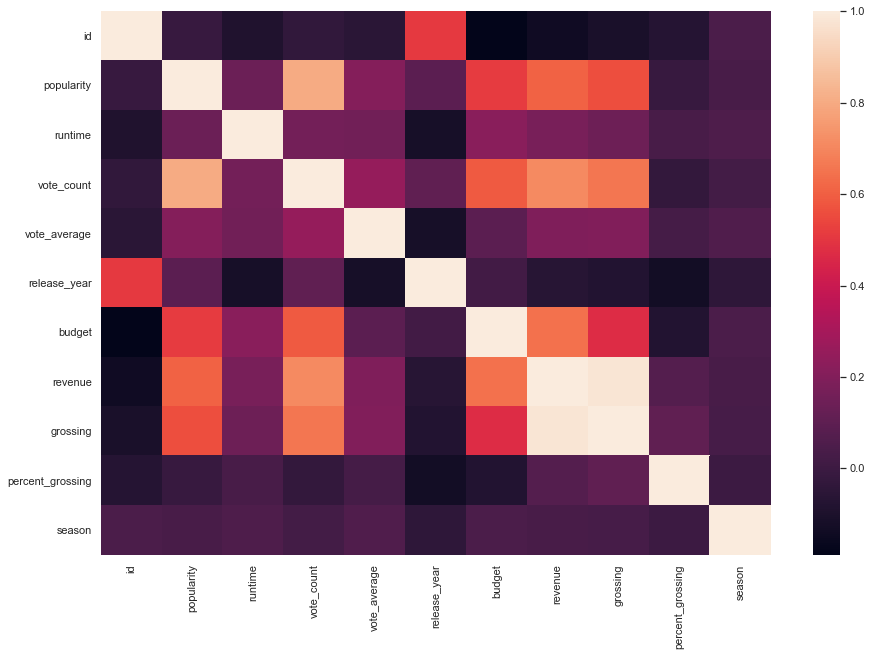

In [41]:
#Determining the Correlation between each variable

plt.figure(figsize=(15,10))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix)

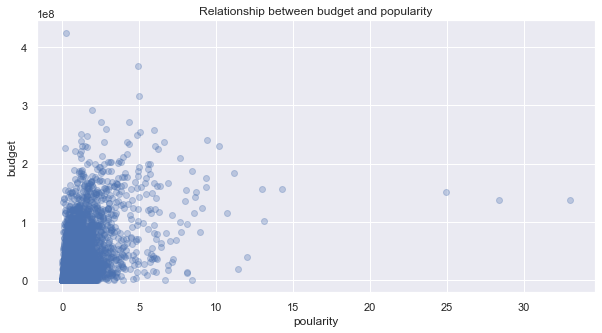

In [42]:
#Budget/Grossing

#1.0 Relationship between budget and popularity: There is some correlation between budget and popularity, around 0.6, so it is definitely worth checking out.
plt.figure(figsize=(10,5))
plt.scatter(df['popularity'], df['budget'], alpha= 0.3)
plt.xlabel('poularity')
plt.ylabel('budget')
plt.title('Relationship between budget and popularity');

From the above, we can see that there is some positive linear correlation between the budget and popularity and this is also seen from the heatmap at the beginning.<br>

This implies that generally speaking, the larger the budget of a movie, the more popular it should be, although this is not always the case

In [43]:
#1.1 Movies that had highest revenue for each year and what year was the most revenue made on movies

highest_revenue_movies_df = df.groupby('release_year', as_index=False)[['revenue', 'original_title']].max()

Text(0, 0.5, 'Movies')

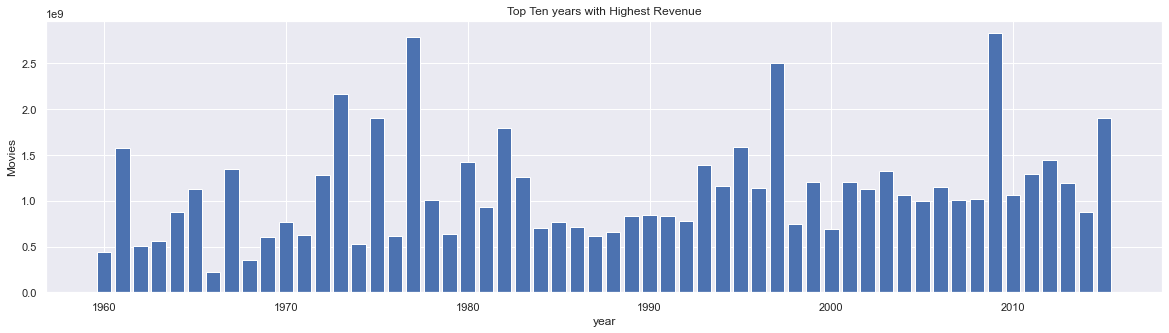

In [44]:
plt.figure(figsize = (20,5))

plt.bar(highest_revenue_movies_df['release_year'], highest_revenue_movies_df['revenue'])
plt.title("Top Ten years with Highest Revenue")
plt.xlabel('year')
plt.ylabel('Movies')

In [45]:
#Plotting the years with the top ten highest revenue

top_ten_highest_revenue_movies = highest_revenue_movies_df.nlargest(10, ['revenue'])
top_ten_highest_revenue_movies

,release_year,revenue,original_title
49,2009,2.827124e+09,zombieland
17,1977,2.789712e+09,wizards
37,1997,2.506406e+09,wishmaster
13,1973,2.167325e+09,westworld
15,1975,1.907006e+09,trilogy of terror
55,2015,1.902723e+09,zipper
22,1982,1.791694e+09,zapped
35,1995,1.583050e+09,white mans burden
1,1961,1.574815e+09,west side story
52,2012,1.443191e+09,zero dark thirty


In [46]:
top_ten_highest_revenue_movies['release_year'] = top_ten_highest_revenue_movies['release_year'].apply(str)

In [47]:
#1.1 Which years were the largest budgets spent on movies<br>
#1.2 Which years were the largest revenues made?<br>
#1.3 Which release months are associated with revenue

In [48]:
highest_revenue_movies_df = df.groupby('release_year', as_index=False)[['revenue', 'original_title']].max()
top_ten_highest_revenue_movies = highest_revenue_movies_df.nlargest(10, ['revenue'])
top_ten_highest_revenue_movies['release_year'] = top_ten_highest_revenue_movies['release_year'].apply(str)

highest_grossing_movies_df = df.groupby('release_year', as_index=False)[['grossing', 'original_title']].max()
top_ten_highest_grossing_movies = highest_grossing_movies_df.nlargest(10, ['grossing'])
top_ten_highest_grossing_movies['release_year'] = top_ten_highest_grossing_movies['release_year'].apply(str)

highest_budget_movies_df = df.groupby('release_year', as_index=False)[['budget', 'original_title']].max()
top_ten_highest_budget_movies = highest_budget_movies_df.nlargest(10, ['budget'])
top_ten_highest_budget_movies['release_year'] = top_ten_highest_budget_movies['release_year'].apply(str)


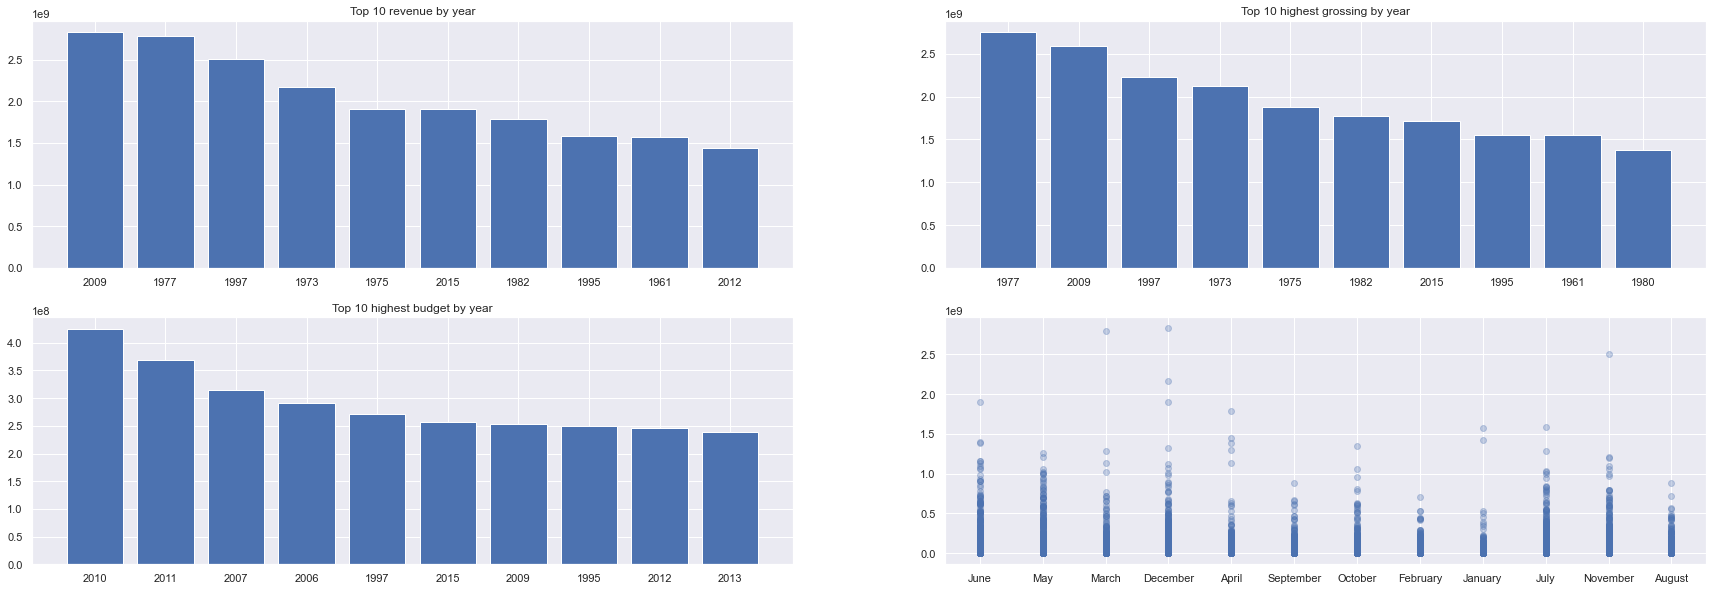

In [49]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(30, 10))

ax1.bar(top_ten_highest_revenue_movies['release_year'], top_ten_highest_revenue_movies['revenue'])
ax1.set_title("Top 10 revenue by year")

ax2.bar(top_ten_highest_grossing_movies['release_year'], top_ten_highest_grossing_movies['grossing'])
ax2.set_title("Top 10 highest grossing by year")

ax3.bar(top_ten_highest_budget_movies['release_year'], top_ten_highest_budget_movies['budget'])
ax3.set_title("Top 10 highest budget by year")

ax4.scatter(df['month'], df['revenue'], alpha = 0.3)

The above charts give the years with the largest budget, highest grossing, and largest revenue. The years 2009, 1997, and 1973 have the highest revenue and highest grossing. <br>
<br>
Budgets for 2010, 2011, 2007, and 2006 were the largest, yet they are not in the top 10 years for revenue generated and highest grossing.

The last chart showing months against total revenue also seems to indicate that around May, June, July along with November, December, the revenue is usually the highest. This indicates that it is around the second and fourth quartiles of the year, that a movie released at these periods generate the most revenue.<br> 

<br>
We will investigate this further in the next question.

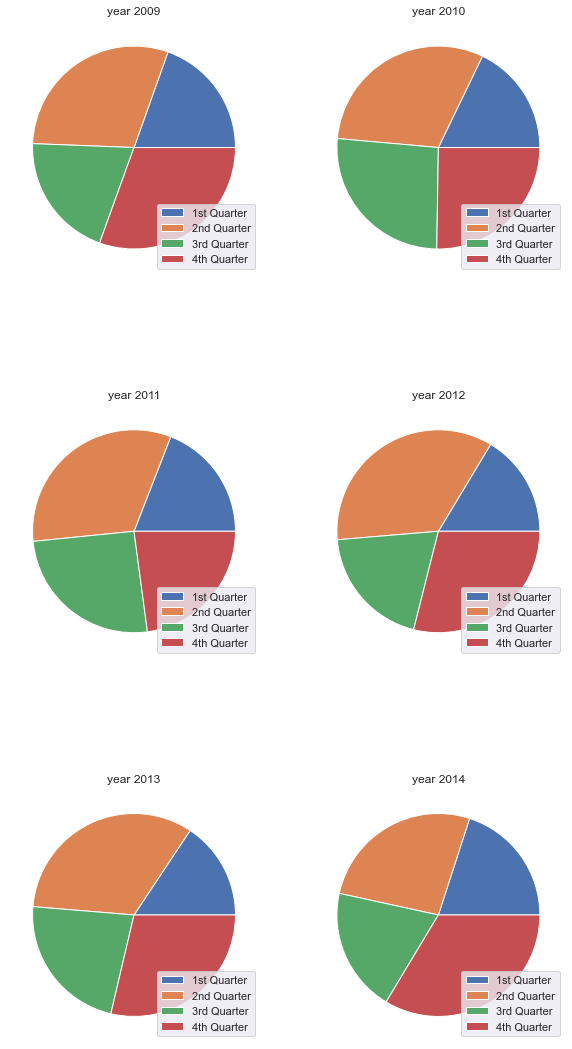

In [50]:
#1.4. The season most movies are released

#The years I am interested in are from 2009 to 2014.

df1 = df.set_index(['release_date'])

years = ['2009', '2010', '2011', '2012', '2013', '2014']



fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(10, 20))

#Using a for loop to create each subplot
for i, year in enumerate(years):
    per_season_df = df1.loc[year].groupby(['season']).sum()
    exec(f'ax{i+1}.pie(per_season_df["revenue"])')
    exec(f'ax{i+1}.set_title(f"year {year}")')
    exec(f'ax{i+1}.legend(["1st Quarter","2nd Quarter","3rd Quarter","4th Quarter"], loc = "lower right")')
    
    
#for year in years:
 #   df1.loc[year].groupby(['season']).sum().plot(kind = 'pie', y = 'revenue',title = f'year {year}')
#df.groupby('season', as_index=False)[['grossing', 'original_title']].count()

We can see that generally, movies tend to be released more in the 2nd and 4th quarters of the year. This could be a reason why the revenue generated during these two periods is higher compared to the other quarters.

## Conclusions

### Summary ###

1. There is a positive correlation between movie Budget and popularity. This implies that a movie with a large budget could be quite popular but a causal relationship between the two variables cannot be firmly established at this time because correlation does not imply causation.<br>


2. The years 2009, 1997, and 1973 have the highest revenue and highest grossing.
<br>

3. Budgets for 2010, 2011, 2007, and 2006 were the largest, yet they are not in the top 10 years for revenue generated and highest grossing. This could imply that a large movie budget does not necessarily guarantee a large grossing or revenue, although this claim needs to be properly investigated.<br>
<br>
4. Movies tend to be released more in the 2nd and 4th quarters of the year according to the IMDB database, and this could be a reason why revenue generated is also the highest at those periods of the year


## Limitations ##

The limitations for this analysis are listed below:<br>
<br>
1. There were a number of missing values in the Director, Genre and Cast columns. The missing values in each column have been inputed with data gotten from manually researching and inputing the data. However, there are still a number of missing values in all 3 columns that have simply been inputted as unknown.<br><br>

2. There are only 10,000+ movies in the dataset. Thus, making generalizations such as "Number of movies for a particular year" might not be exactly representative of reality as many more movies not in this dataset have been produced in the same period of time.<br>

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295